In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Jadi disini kami menggunakan data deret harga emas tiap tahun(akhir tahun)

In [3]:
df = pd.read_csv('hargaemasdolar.csv')
df = pd.DataFrame(df)
df

,Date,Price
0,1950-12,34.720
1,1951-12,34.660
2,1952-12,34.790
3,1953-12,34.850
4,1954-12,35.040
...,...,...
65,2015-12,1068.317
66,2016-12,1152.165
67,2017-12,1265.674
68,2018-12,1249.887


In [4]:
dfnew = df['Price']
dfnew

0       34.720
1       34.660
2       34.790
3       34.850
4       35.040
        ...   
65    1068.317
66    1152.165
67    1265.674
68    1249.887
69    1480.025
Name: Price, Length: 70, dtype: float64

<AxesSubplot:>

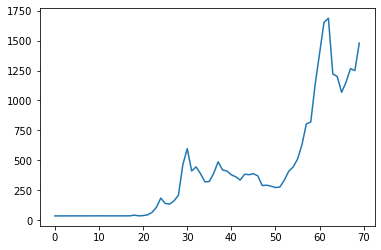

In [5]:
dfnew.plot()

Bagaimana cara memilih p, d, dan q untuk model ARIMA di Python? Untuk itu, kita perlu menentukan urutan differencing "d." Pertama-tama mari kita periksa plot autokorelasi. Paket statsmodel dapat membantu kita dengan ini-


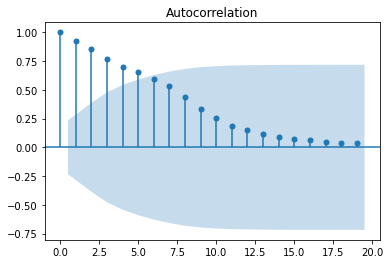

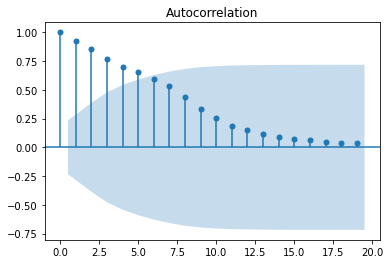

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dfnew)

Jelas, data tidak ideal untuk model ARIMA untuk langsung memulai pelatihan autoregresif. Jadi mari kita lihat bagaimana segmen arima yang berbeda membuat data tidak bergerak.

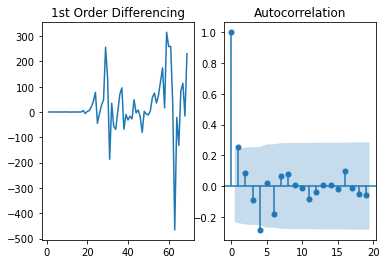

In [7]:
# 1st
first = dfnew.diff()
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(first)

ax2 = f.add_subplot(122)
plot_acf(first.dropna(),ax=ax2)
plt.show()

Seperti yang terlihat di atas, differencing orde pertama mengguncang autokorelasi secara signifikan. Kita juga dapat mencoba differencing urutan ke-2 untuk meningkatkan sifat stasioner

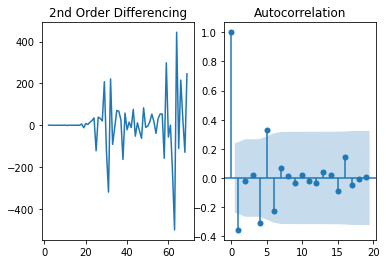

In [9]:
#2nd
second = dfnew.diff().diff()
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(second)

ax2 = f.add_subplot(122)
plot_acf(second.dropna(),ax=ax2)
plt.show()

Dari grafik autokorelasi, kita dapat memutuskan apakah diperlukan lebih banyak differencing. Jika secara kolektif autokorelasi, atau titik data dari setiap lag (dalam sumbu horizontal), positif untuk beberapa kelambatan berturut-turut, lebih banyak perbedaan mungkin diperlukan. Sebaliknya, jika lebih banyak titik data negatif, seri ini terlalu berbeda.

# Augmented Dickey-Fuller 

Tes ADF bertujuan untuk menolak hipotesis nol bahwa data deret waktu yang diberikan adalah non-stasioner. Ini menghitung nilai p dan membandingkannya dengan nilai ambang batas atau tingkat signifikansi 0,05. Jika nilai p kurang dari level ini, maka datanya tidak bergerak; lain, urutan differencing bertambah satu.

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dfnew.dropna())
print('p-value: ', result[1])

result = adfuller(first.dropna())
print('p-value: ', result[1])

result = adfuller(second.dropna())
print('p-value: ', result[1])

p-value:  0.9154343986699289
p-value1:  0.0015888877989239188
p-value:  3.554778233283908e-07


Seperti yang kita lihat di atas, setelah urutan ke-2 berbeda, nilai p turun melampaui ambang batas yang dapat diterima. Dengan demikian, kita dapat mempertimbangkan urutan differencing ("d") sebagai 2. Ini sesuai dengan grafik garis autokorelasi yang terlihat di atas. Namun, nilai p untuk urutan pertama jauh lebih dekat ke ambang batas, jadi untuk menjadi konservatif, kami akan mempertimbangkan "d" sebagai 1 dan melihat bagaimana kinerja model.

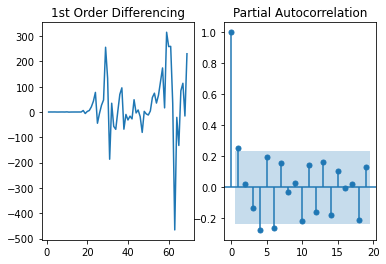

In [11]:
# 1st
first = dfnew.diff()
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(first)

ax2 = f.add_subplot(122)
plot_pacf(first.dropna(),ax=ax2)
plt.show()

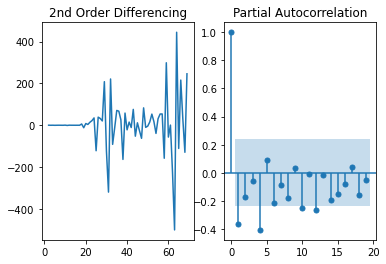

In [12]:
#2nd
second = dfnew.diff().diff()
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(second)

ax2 = f.add_subplot(122)
plot_pacf(second.dropna(),ax=ax2)
plt.show()

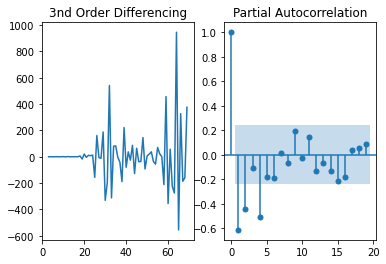

In [24]:
#3nd
tiga= dfnew.diff().diff().diff()
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('3nd Order Differencing')
ax1.plot(second)

ax2 = f.add_subplot(122)
plot_pacf(second.dropna(),ax=ax2)
plt.show()

# How to Fit an ARIMA model?

Dengan menggunakan kelas ARIMA dari modul statsmodels.tsa.arima_model, kita dapat memberi makan data dan hyperparameter p, d, dan q ke dalamnya (dalam urutan itu). Memanggil metode fit() modul ini mengembalikan model terlatih yang digunakan untuk evaluasi dan inferensi.

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
arima_model = ARIMA(dfnew, order=(1,1,2))
model = arima_model.fit()
print(model.summary())

C:\Users\Acer A514-53\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                   69
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -415.320
Method:                       css-mle   S.D. of innovations             99.391
Date:                Tue, 26 Apr 2022   AIC                            840.639
Time:                        23:21:31   BIC                            851.810
Sample:                             1   HQIC                           845.071
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.9672     17.576      1.250      0.211     -12.481      56.416
ar.L1.D.Price    -0.0204      0.349     -0.058      0.953      -0.705       0.664
ma.L1.D.Price     0.2703      0.324     

C:\Users\Acer A514-53\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [13]:
arima_model = ARIMA(dfnew, order=(1,2,2))
model = arima_model.fit()
print(model.summary())

C:\Users\Acer A514-53\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                   68
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -408.467
Method:                       css-mle   S.D. of innovations             93.655
Date:                Tue, 26 Apr 2022   AIC                            826.935
Time:                        23:21:32   BIC                            838.032
Sample:                             2   HQIC                           831.332
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8985      0.678      1.325      0.185      -0.431       2.228
ar.L1.D2.Price    -0.6621      0.094     -7.070      0.000      -0.846      -0.479
ma.L1.D2.Price -7.261e-05      0.069

C:\Users\Acer A514-53\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Acer A514-53\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                     

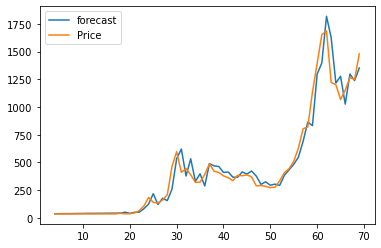

In [14]:
model.plot_predict(dynamic=False)
plt.show()